<h1>Competição Kaggle: Titanic</h1>

https://www.kaggle.com/c/titanic

Esse notebook mostra o passo a passo de minha primeira competiçao no Kaggle.

Todas as referências usadas para construção desse notebook estão disponíveis no final do arquivo.


<h3>Workflow</h3>

Como primeiro projeto, foi usado o seguinte plano de trabalho para nortear a construção desse notebook (Baseado na referência):

1. Pergunta ou definição do problema.
2. Carregar dados de treino e teste.
3. Preparação e Limpeza dos dados.
4. Análise exploratória dos dados.
5. Modelo, predição e resolução do problema.
6. Visualização, relatórios e apresentação dos passos finais da solução.
7. Disponibilizar resultados.

A lista acima é somente um padrão usado como ponto de partida, não necessáriamente todas as etapas são seguidas nessa ordem.

Etapas como Visualização, Análise e outras podem ser feitas no decorrer de outras etapas.

<h4>Workflow Gols</h4>

1. Classificação
    1. É preciso classificar ou categorizar as amostras. Também é preciso entender as implicações ou correlações de diferentes classes com nossa solução ideal.
2. Correlação
    1. Pode-se abordar o problema com base nas features disponiveis dentro do conjunto de dados de treinamento. Quais features contribuem significamente para a solução ideal ? Há uma correlação entre uma feature e a solução ideal ? Os valores das features quando o objetivo também muda e vice-versa ? Isso pode ser testado para features númericas ? e não númericas ? Podemos também determinar a correlação entre outras features além da sobrevivência para objetivos futuros. Correlacionar determinadas features pode ajudar na criação, conclusão ou correção de features.
3. Conversão
    1. Para a etapa de modelagem, pode ser necessário preparar os dados.
4. Completar dados
5. Corrigir dados
    1. Remover erros ou outliers
6. Criar dados
    1. Criar novas features, desde que as novas features sigam a correlação.
7. Visualização

<h3>Definição do problema</h3>

O objetivo é criar um modelo que aprenda, com base em um conjunto de treinamento, com amostras que listam passageiros que sobreviveram ou não ao desastre do Titanic. Afim de que posteriormente, aplicado a uma base que esse modelo desconhece, ele possa identificar quem, desse conjunto de dados teste, sobreviveu ou não.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV, learning_curve

<h3>Carregando dados</h3>

Usando pandas para carregar os dados de treinamento e teste

In [2]:
#lendo conjunto de dados
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


<h3>Analizando dados</h3>

<h5>Quais features são categóricas?</h5>

Features do tipo categoria, classificam as amostras dentro de grupos similares. 

1. Survived (Nominal) - sobreviveu
2. Sex (Nominal) - sexo
3. Embarked (Nominal) - Portão de embarque
4. Pclass (Ordinal)  -  classe 1 = 1st, 2 = 2nd, 3 = 3rd

<h5>Quais features são númericas? </h5>

Feature do tipo númericas, são features que variam de amostra para amostra.

1. Age (Continua) - Idade
2. Fare (Continua) - tarifa de passageiro
3. SibSp (Discreta) - nº irmãos ou conjuges a bordo
4. Parch (Discreta) - nº pais ou filhos a bordo

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<h5>Quais features contém Null ou dados em branco nas amostras ? </h5>

1. Cabin > Age > Embarked em quantidade de dados nulos na base de treino
2. Cabin > Age em quantidade de dados nulos na base de teste

Isso deverá ser corrigido na etapa de processamento dos dados.

<h5>Quais os tipos das diferentes features ? </h5>

1. Base de treino: float64(2), int64(5), object(5)
2. Base de teste: float64(2), int64(4), object(5)

In [5]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

<h5>Qual a distribuição das features númericas? </h5>

Isso ajuda a determinar, além de outros insights, quão representativo é o dataset de treino.

1. Total de amostras é 891 ou 40% do número real de passageiros a bordo do Titanic (2224)
2. Certa de 38% das amostras sobreviveram, próximo da taxa real de sobreviventes que é de 32%
3. Maioria dos passageiros (>75%) não viajaram com Pais ou filhos
4. Aproximadamente 30% dos passageiros tinham irmãos ou cônjuge a bordo
5. A taxa de embarque varia significativamente, com poucos passageiros (<1%) pagando até 512
6. Poucos passageiros com idade entre 65-80.

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h5>Qual a distribuição das features categóricas</h5>

1. Name só tem tem dados não repetidos.
2. Feature Sex tem 65% Homens
3. Cabin tem valores duplicados ou Muitos passageiros dividiam cabines
4. Embarked tem 3 possibilidades e a maior ocorrencia é o valor S
5. Ticket tem uma alta taxa de duplicidade 22%

In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bing, Mr. Lee",male,347082,B96 B98,S
freq,1,577,7,4,644


<h4>Análise por agrupamento</h4>

Nessa etapa foi usado agrupamento de features para verificar se exitem possíveis correlações entre determinada feature e a sobrevivência.

1. Pclass: Foi observado uma correlação significativa, mais de 50% das amostras de Pclass 1 sobreviveram
2. Sex: Também foi encontrada correlação, já que o sexo feminino teve uma alta taxa de sobrevivência.
3. SibSp e Parch: Já essas features não tiveram correlação para alguns valores. Talvez seja melhor a partir dessas features criar novas, que possam apresentar maior correlação.

In [8]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<h4>Análise por visualização</h4>

Agora para continuar com a análise, foi utilizado gráficos para tentar identificar correlação.

<h5>Correlação de features númericas</h5>

1. Crianças de idade abaixo de 5 anos, tiveram uma alta de sobrevivência
2. Idosos, de 80 anos sobreviveram
3. Grande número de pessoas entre 15-25 anos não sobreviveram
4. Nauirua dis oassageiros tem entre 15-35 anos


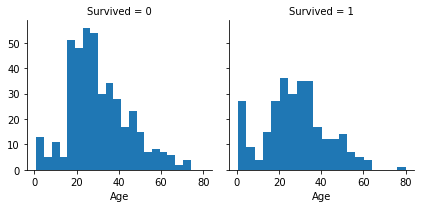

In [12]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<h5>Correlação de features não númericas</h5>

1. Crianças de idade abaixo de 5 anos, tiveram uma alta de sobrevivência
2. Idosos, de 80 anos sobreviveram
3. Grande número de pessoas entre 15-25 anos não sobreviveram
4. Maioria de passageiros tem entre 15-35 anos


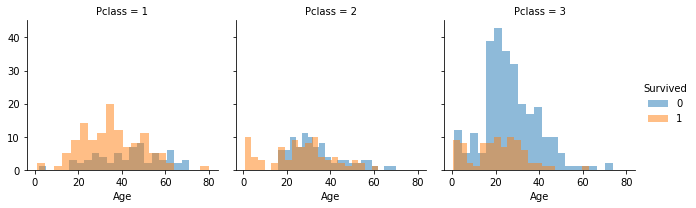

In [13]:
grid = sns.FacetGrid(train, col='Pclass', hue='Survived')
#grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\vdscruz\Anaconda3\envs\torch\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\vdscruz\Anaconda3\envs\torch\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


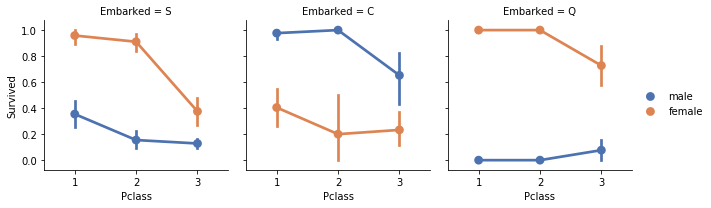

In [14]:
grid = sns.FacetGrid(train, col='Embarked')
#grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

<h4>Correlação features númericas e não númericas</h4>

1. Amostras com altso Fare (taxa de embarque) tem maior número de sobreviventes.
2. Portão de embarque tb esta colelacionado com sobrevivência

C:\Users\vdscruz\Anaconda3\envs\torch\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


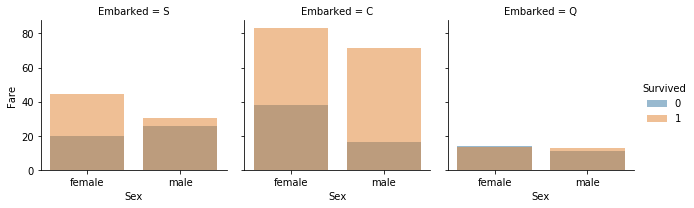

In [15]:
grid = sns.FacetGrid(train, col='Embarked', hue='Survived')
#grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

<h3>Pré processamento dos dados</h3>

Depois de análisar os dados, algumas médidas precisam ser tomadas antes de submeter os dados a algum modelo de aprendizado

<h4>Removendo features</h4>

Para iniciar seram removidas as colunas Cabin e Ticket por ter muitos dados duplicados.

In [16]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

<h4>Criando features</h4>

1. Title: feature que contém os titulos mais comuns nas amostras, titulos que acompanham o nome. Foi criada essa feature por ter uma correlação entre titulos e a sobrevivência.
2. AgeRange: em vez de armazenar uma idade, armazenar uma faixa etária.
3. IsAlone: feature que indica se o passageiro estava sozinho ou não.
4. fareRange: feature indica a faixa de Fare_fam
5. FamilySize: Quantidade de pessoas por família

In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
#renomeando possíveis erros de digitação e titulos menos recorrentes.

titles = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Master',
    'Rev': 'Mr',
    'Col': 'Mr',
    'Ms': 'Miss',
    'Mlle': 'Mrs',
    'Major': 'Mr',
    'Don': 'Mr',
    'Dona': 'Miss',
    'the Countess': 'Miss',
    'Jonkheer': 'Mrs',
    'Lady': 'Mrs',
    'Sir': 'Mr',
    'Mme': 'Miss',
    'Capt': 'Mr',
    'Countess': 'Miss'
}

for dataset in combine:
    #dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    #dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    #dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    #dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].apply(lambda x: titles[x] if x in titles.keys() else x).astype('category')
    dataset['Name'] = dataset['Name'].str.replace(r",.*", "").astype('category')
    


    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.553191
1,Miss,0.702703
2,Mr,0.158491
3,Mrs,0.790698


In [19]:
#renomeando váriavel de texto em número
title_mapping = {"Master": 1, "Miss": 2, "Mr": 3, "Mrs": 4}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,Braund,male,22.0,1,0,7.2500,S,3
1,2,1,1,Cumings,female,38.0,1,0,71.2833,C,4
2,3,1,3,Heikkinen,female,26.0,0,0,7.9250,S,2


In [20]:
#removendo variável Name e PassengerId
#train = train.drop(['Name', 'PassengerId'], axis=1)
train = train.drop(['PassengerId'], axis=1)
#test = test.drop(['Name'], axis=1)
combine = [train, test]

In [21]:
#renomeando váriavel sex para inteiro
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,Braund,0,22.0,1,0,7.2500,S,3
1,1,1,Cumings,1,38.0,1,0,71.2833,C,4
2,1,3,Heikkinen,1,26.0,0,0,7.9250,S,2


<h4>Completando dados</h4>

1. Para completar os dados da feature Age, vamos usar médias, levando em consideração outras váriaveis para calcular a média.

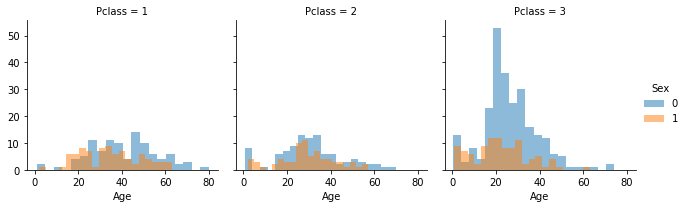

In [22]:
grid = sns.FacetGrid(train, col='Pclass', hue='Sex')
#grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [23]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [24]:
#calculando médias para os diferentes grupos e setando nos respectivos null values
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,Braund,0,22,1,0,7.2500,S,3
1,1,1,Cumings,1,38,1,0,71.2833,C,4
2,1,3,Heikkinen,1,26,0,0,7.9250,S,2


In [25]:
#criando AgeBand
train['AgeBand'] = pd.cut(train['Age'], 5)
train['AgeRange'] = 0;
test['AgeRange'] = 0;
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [26]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,AgeRange
0,0,3,Braund,0,22,1,0,7.2500,S,3,"(16.0, 32.0]",0
1,1,1,Cumings,1,38,1,0,71.2833,C,4,"(32.0, 48.0]",0
2,1,3,Heikkinen,1,26,0,0,7.9250,S,2,"(16.0, 32.0]",0
3,1,1,Futrelle,1,35,1,0,53.1000,S,4,"(32.0, 48.0]",0
4,0,3,Allen,0,35,0,0,8.0500,S,3,"(32.0, 48.0]",0


In [27]:
#alterando dados da feature Age
for dataset in combine:
    
    dataset.loc[ dataset['Age'] <= 16, 'AgeRange'] = 0
    #dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'AgeRange'] = 1
    #dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'AgeRange'] = 2
    #dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'AgeRange'] = 3
    #dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    
    dataset.loc[ dataset['Age'] > 64, 'AgeRange'] = 4
    #dataset.loc[ dataset['Age'] > 64, 'Age']
    
    
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,AgeRange
0,0,3,Braund,0,22,1,0,7.2500,S,3,"(16.0, 32.0]",1
1,1,1,Cumings,1,38,1,0,71.2833,C,4,"(32.0, 48.0]",2
2,1,3,Heikkinen,1,26,0,0,7.9250,S,2,"(16.0, 32.0]",1
3,1,1,Futrelle,1,35,1,0,53.1000,S,4,"(32.0, 48.0]",2
4,0,3,Allen,0,35,0,0,8.0500,S,3,"(32.0, 48.0]",2


In [28]:
#removendo AgeBand
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeRange
0,0,3,Braund,0,22,1,0,7.2500,S,3,1
1,1,1,Cumings,1,38,1,0,71.2833,C,4,2
2,1,3,Heikkinen,1,26,0,0,7.9250,S,2,1


In [29]:
for dataset in combine:
    dataset['FamilySize'] = (dataset['SibSp'] + dataset['Parch'] + 1)
    dataset['Fare_fam'] = dataset['Fare'] * dataset['FamilySize']

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
train['Fare_fam_Range'] = pd.cut(train['Fare_fam'], 7)
train['fareRange'] = 0
test['fareRange'] = 0
train[['Fare_fam_Range', 'Survived']].groupby(['Fare_fam_Range'], as_index=False).mean().sort_values(by='Fare_fam_Range', ascending=True)

,Fare_fam_Range,Survived
0,"(-1.578, 225.429]",0.370595
1,"(225.429, 450.857]",0.538462
2,"(450.857, 676.286]",0.733333
3,"(676.286, 901.714]",0.000000
4,"(901.714, 1127.143]",1.000000
5,"(1127.143, 1352.571]",1.000000
6,"(1352.571, 1578.0]",0.500000


In [31]:
def fare_fam_range(fare_r):
    if fare_r <= 255.429:
        return 0
    elif fare_r <= 450.857 and fare_r > 255.429:
        return 1
    elif fare_r <= 676.286 and fare_r > 450.857:
        return 2
    elif fare_r <= 901.714 and fare_r > 676.286:
        return 3
    elif fare_r <= 1127.143 and fare_r > 901.714:
        return 4
    elif fare_r <= 1352.571 and fare_r > 1127.143:
        return 5
    elif fare_r <= 1578 and fare_r > 1352.571:
        return 6
    else:
        return 7
    
train['fareRange'] = train['Fare'].apply(fare_fam_range)
test['fareRange'] = test['Fare'].apply(fare_fam_range)

In [32]:

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [33]:
#train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
#train = train.drop(['Fare_fam_Range', 'Fare_fam', 'Age'], axis=1)
#test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
#test = test.drop(['Fare_fam', 'Age'], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeRange,FamilySize,Fare_fam,Fare_fam_Range,fareRange,IsAlone
0,0,3,Braund,0,22,1,0,7.2500,S,3,1,2,14.5000,"(-1.578, 225.429]",0,0
1,1,1,Cumings,1,38,1,0,71.2833,C,4,2,2,142.5666,"(-1.578, 225.429]",0,0
2,1,3,Heikkinen,1,26,0,0,7.9250,S,2,1,1,7.9250,"(-1.578, 225.429]",0,1
3,1,1,Futrelle,1,35,1,0,53.1000,S,4,2,2,106.2000,"(-1.578, 225.429]",0,0
4,0,3,Allen,0,35,0,0,8.0500,S,3,2,1,8.0500,"(-1.578, 225.429]",0,1


In [34]:
#criando nova feature combinação de duas outras
for dataset in combine:
    dataset['Age*Class'] = dataset.AgeRange * dataset.Pclass

In [35]:
train[['Age*Class', 'Survived']].groupby(['Age*Class'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age*Class,Survived
1,1,0.728814
0,0,0.550000
2,2,0.520408
4,4,0.415094
3,3,0.277487
5,6,0.149425
7,9,0.111111
6,8,0.000000
8,12,0.000000


In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [37]:
#alterando de string para int Embarked

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
    

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeRange,FamilySize,Fare_fam,Fare_fam_Range,fareRange,IsAlone,Age*Class
0,0,3,Braund,0,22,1,0,7.2500,0,3,1,2,14.5000,"(-1.578, 225.429]",0,0,3
1,1,1,Cumings,1,38,1,0,71.2833,1,4,2,2,142.5666,"(-1.578, 225.429]",0,0,2
2,1,3,Heikkinen,1,26,0,0,7.9250,0,2,1,1,7.9250,"(-1.578, 225.429]",0,1,3
3,1,1,Futrelle,1,35,1,0,53.1000,0,4,2,2,106.2000,"(-1.578, 225.429]",0,0,2
4,0,3,Allen,0,35,0,0,8.0500,0,3,2,1,8.0500,"(-1.578, 225.429]",0,1,6


In [38]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeRange,FamilySize,Fare_fam,fareRange,IsAlone,Age*Class
0,892,3,Kelly,0,34,0,0,7.8292,2,3,2,1,7.8292,0,1,6
1,893,3,Wilkes,1,47,1,0,7.0000,0,4,2,2,14.0000,0,0,6
2,894,2,Myles,0,62,0,0,9.6875,2,3,3,1,9.6875,0,1,6
3,895,3,Wirz,0,27,0,0,8.6625,0,3,1,1,8.6625,0,1,3
4,896,3,Hirvonen,1,22,1,1,12.2875,0,4,1,3,36.8625,0,0,3


In [39]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [40]:

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0    
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1    
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2    
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3    
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]   


In [41]:
#train = train.drop([], axis=1)
train = train.drop(['Age*Class','Name', 'Age', 'Fare_fam', 'Fare_fam_Range'], axis=1)
#train = train.drop(['Age*Class'], axis=1)
train.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeRange,FamilySize,fareRange,IsAlone
0,0,3,0,1,0,0,0,3,1,2,0,0
1,1,1,1,1,0,3,1,4,2,2,0,0
2,1,3,1,0,0,1,0,2,1,1,0,1
3,1,1,1,1,0,3,0,4,2,2,0,0
4,0,3,0,0,0,1,0,3,2,1,0,1
5,0,3,0,0,0,1,2,3,1,1,0,1
6,0,1,0,0,0,3,0,3,3,1,0,1
7,0,3,0,3,1,2,0,1,0,5,0,0
8,1,3,1,0,2,1,0,4,1,3,0,0
9,1,2,1,1,0,2,1,4,0,2,0,0


In [42]:
test = test.drop(['Age*Class','Name', 'Age', 'Fare_fam'], axis=1)
#test = test.drop(['Age*Class'], axis=1)
test.head(10)

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeRange,FamilySize,fareRange,IsAlone
0,892,3,0,0,0,0,2,3,2,1,0,1
1,893,3,1,1,0,0,0,4,2,2,0,0
2,894,2,0,0,0,1,2,3,3,1,0,1
3,895,3,0,0,0,1,0,3,1,1,0,1
4,896,3,1,1,1,1,0,4,1,3,0,0
5,897,3,0,0,0,1,0,3,0,1,0,1
6,898,3,1,0,0,0,2,2,1,1,0,1
7,899,2,0,1,1,2,0,3,1,3,0,0
8,900,3,1,0,0,0,1,4,1,1,0,1
9,901,3,0,2,0,2,0,3,1,3,0,0


<h2>Modelos</h2>

In [43]:
from sklearn.model_selection import train_test_split

#separando features e target para criação do modelo
x = pd.get_dummies(train.drop('Survived', axis=1))
y = train['Survived']
test_x = pd.get_dummies(test.drop('PassengerId', axis=1))

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.1,random_state =0)
#X_train, Y_train = x, y

In [44]:
print(x.shape, test_x.shape)
print(X_train.shape, Y_test.shape)

(891, 11) (418, 11)
(801, 11) (90,)


In [45]:
def model_name(model):
    return str(model).split('(')[0]

model_search = {}
models = [XGBClassifier(), 
          LogisticRegression(), 
          SVC(), 
          KNeighborsClassifier(), 
          GaussianNB(), 
          Perceptron(), 
          LinearSVC(), 
          SGDClassifier(), 
          DecisionTreeClassifier(), 
          RandomForestClassifier()]

label = []
score = []
std_score = []

for model in models:
    results = cross_val_score(model, X_train, Y_train, cv=3)
    #model_search[model_name(model)] = results_test
    with np.printoptions(precision=3, suppress=True):
        label.append(model_name(model))
        
        score.append(round(results.mean() * 100, 2))
        std_score.append(round(results.std() * 100, 2))
        
        #print(model_name(model), model_search[model_name(model)], "\t {:.03f}({:.03f})".format(results.mean(), results.std()))
        
model_df = pd.DataFrame({
    'Model': label,
    'Score': score,
    'Std': std_score})

model_df.sort_values(by='Score', ascending=False)

C:\Users\vdscruz\Anaconda3\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vdscruz\Anaconda3\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vdscruz\Anaconda3\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vdscruz\Anaconda3\envs\torch\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vdscruz\Anacon

,Model,Score,Std
2,SVC,82.52,1.07
0,XGBClassifier,82.15,1.41
6,LinearSVC,80.40,1.45
3,KNeighborsClassifier,80.02,0.93
9,RandomForestClassifier,79.90,1.68
1,LogisticRegression,79.78,1.59
8,DecisionTreeClassifier,78.65,1.83
5,Perceptron,76.03,2.14
4,GaussianNB,74.53,9.09
7,SGDClassifier,70.29,10.78


In [46]:
params = {
        'learning_rate': np.logspace(-3, 0, 10),
        'gamma': np.linspace(0.005, 5.0, 10),
        'max_depth': [3, 5, 7, 9, 12, 15, 17, 25],
        'min_child_weight': range(1, 10, 2),
        'reg_lambda': np.linspace(0.1, 1.0, 10)
    }

clf = XGBClassifier()
rscv = RandomizedSearchCV(clf, params, n_jobs=-1, cv=3, n_iter=100, scoring='accuracy', verbose=True, return_train_score=False)
rscv.fit(X_train, Y_train);

results = pd.DataFrame(rscv.cv_results_).sort_values(by='mean_test_score', ascending=False)
results = results[['mean_test_score','std_test_score']]
model = rscv.best_estimator_
results.head()

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.8s finished


,mean_test_score,std_test_score
42,0.827715,0.018348
82,0.827715,0.006116
56,0.826467,0.007696
14,0.825218,0.010739
52,0.825218,0.001766


In [47]:
model.score(X_test, Y_test)

0.8

In [48]:
sub = pd.DataFrame()
sub['PassengerId'] = test['PassengerId']
sub['Survived'] = model.predict(test_x)
sub.to_csv('./output/submission.csv', index=False)

In [49]:
#referências

# 1 - https://paulovasconcellos.com.br/competicao-kaggle-titanic-tutorial-5b11993774f7
# 2 - https://www.kaggle.com/spidy20/80-accuracy-in-titanic-dataset-for-beginner
# 3 - https://www.kaggle.com/startupsci/titanic-data-science-solutions
# 4 - https://www.kaggle.com/willianw/titanic-survival-prediction